In [7]:
%pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [6]:
%pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl.metadata (355 bytes)
Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)

   ---------------------------------------- 0/3 [sklearn-compat]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   ------------- -------------------------- 1/3 [imbalanced-learn]
   -

In [27]:
%pip install tensorflow_addons

   ---------------------------------------- 0.0/719.8 kB ? eta -:--:--
   --------------------------------------- 719.8/719.8 kB 14.8 MB/s eta 0:00:00

   -------------------- ------------------- 1/2 [tensorflow_addons]
   -------------------- ------------------- 1/2 [tensorflow_addons]
   -------------------- ------------------- 1/2 [tensorflow_addons]
   -------------------- ------------------- 1/2 [tensorflow_addons]
   -------------------- ------------------- 1/2 [tensorflow_addons]
   -------------------- ------------------- 1/2 [tensorflow_addons]
   -------------------- ------------------- 1/2 [tensorflow_addons]
   -------------------- ------------------- 1/2 [tensorflow_addons]
   -------------------- ------------------- 1/2 [tensorflow_addons]
   -------------------- ------------------- 1/2 [tensorflow_addons]
   -------------------- ------------------- 1/2 [tensorflow_addons]
   -------------------- ------------------- 1/2 [tensorflow_addons]
   -------------------- --------

In [28]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from imblearn.over_sampling import SMOTE
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.regularizers import l2
from tensorflow.keras import regularizers
from sklearn.utils import class_weight
import tensorflow_addons as tfa


c:\Users\1cnac\OneDrive\Documentos\INGENIERÍA MATEMÁTICA\Inteligencia Artificial\Redes-neuronales\rn_env\lib\site-packages\tensorflow_addons\utils\tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [16]:
pd.set_option('display.max_columns', None)  # Mostrar todas las columnas en la salida

# Cargar los datos preprocesados
df = pd.read_csv("../data/datos_preprocesados.csv")

df.head()

,fumador,actividad_fisica,vive,edad,sexo,nivel_educativo,ingresos_mensuales,gastos_salud,deudas,diabetes,hipertension,obesidad,cancer,enfermedad_cardiaca,epoc,glucosa,colesterol,trigliceridos,hemoglobina,leucocitos,plaquetas,creatinina,mut_BRCA1,mut_TP53,mut_EGFR,mut_KRAS,mut_PIK3CA,mut_ALK,mut_BRAF,estado_civil_Casado,estado_civil_Divorciado,estado_civil_Soltero,estado_civil_Viudo,tipo_empleo_Autónomo,tipo_empleo_Desempleado,tipo_empleo_Privado,tipo_empleo_Público,tipo_empleo_Temporal,ocupacion_Autónomo,ocupacion_Desempleado,ocupacion_Empleado,ocupacion_Jubilado,continente_nacimiento_América,continente_nacimiento_Antártida,continente_nacimiento_Asia,continente_nacimiento_Europa,continente_nacimiento_Oceanía,continente_nacimiento_África
0,1.0,-1.039961,1.0,0.750106,0,-0.44961,1.499543,2.487493,0.0,1.0,1.0,1.0,0.0,1.0,0.0,1.125931,1.116180,0.518919,-0.262543,-0.924342,0.202956,-0.323535,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
1,0.0,0.344623,0.0,-1.028843,1,0.44846,2.557298,-0.885562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.549388,-1.768373,-1.357231,0.177002,-0.083060,0.709850,-0.883740,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,-1.039961,1.0,1.711700,1,-1.34768,1.082786,-0.885562,0.0,0.0,0.0,0.0,0.0,0.0,1.0,-0.436864,-0.699218,-2.059947,-0.742047,0.481094,-0.116266,2.570857,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1.0,-1.039961,0.0,1.182823,1,-0.44961,-0.009775,2.487493,0.0,1.0,0.0,1.0,1.0,1.0,0.0,-0.258148,0.287809,-0.946194,-0.552243,1.490633,-0.122279,1.030293,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.344623,1.0,-0.740365,0,1.34653,0.011400,-0.885562,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-1.940861,-1.565293,-2.566843,-1.161613,1.134325,-0.389633,-0.743689,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
# Asumimos que el DataFrame df ya existe y contiene la columna 'vive'
# Calculamos la correlación de todas las columnas numéricas con 'vive'
correlaciones = df.corr(numeric_only=True)['vive'].sort_values(key=abs, ascending=False)

# Mostramos las 15 columnas con mayor correlación (positiva o negativa) con 'vive'
correlaciones_mas_fuertes = correlaciones.drop('vive').head(51)
correlaciones_mas_fuertes

cancer                            -0.272906
gastos_salud                      -0.262333
enfermedad_cardiaca               -0.242263
creatinina                        -0.087198
epoc                              -0.062929
hipertension                      -0.060034
diabetes                          -0.056181
leucocitos                        -0.052074
fumador                           -0.042654
glucosa                           -0.035429
colesterol                        -0.034901
edad                              -0.031451
actividad_fisica                   0.030640
obesidad                          -0.029257
ingresos_mensuales                 0.017886
ocupacion_Autónomo                 0.009621
trigliceridos                     -0.009379
tipo_empleo_Privado                0.009271
continente_nacimiento_Antártida   -0.007006
estado_civil_Viudo                -0.006747
deudas                            -0.006293
estado_civil_Casado                0.006252
tipo_empleo_Desempleado         

In [18]:
# quiero saber el numero de filas y columnas de df
print(f"El DataFrame tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El DataFrame tiene 50000 filas y 48 columnas.


In [ ]:
y = df['vive']

X = df[['cancer', 'gastos_salud', 'enfermedad_cardiaca', 'creatinina', 'epoc', 'hipertension', 'diabetes', 
        'leucocitos', 'fumador', 'glucosa', 'colesterol', 'edad', 'actividad_fisica', 'obesidad', 'ingresos_mensuales', 
        'trigliceridos', 'tipo_empleo_Privado', 'estado_civil_Viudo', 
        'deudas', 'tipo_empleo_Desempleado', 'plaquetas', 'ocupacion_Jubilado', 'mut_BRAF', 'hemoglobina', 'mut_PIK3CA', 
        'mut_BRCA1', 'nivel_educativo', 'mut_ALK', 'tipo_empleo_Público', 'mut_TP53', 'mut_EGFR',
        'estado_civil_Soltero', 'continente_nacimiento_África']]

# División y SMOTE
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)


model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train.shape[1],)),
    tf.keras.layers.Dense(36, activation='relu',
        kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.2),
    tf.keras.layers.Dense(20, activation='relu',
        kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dropout(0.1),
    tf.keras.layers.Dense(10, activation='relu',
        kernel_regularizer=regularizers.l2(0.001)),
    tf.keras.layers.Dense(1, activation='sigmoid')
])



# Compilación
model.compile(optimizer="adam", loss='binary_crossentropy', metrics=['accuracy'])

# Callback de early stopping
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',   # métrica que se observa
    patience=7,           # número de epochs sin mejora antes de parar
    restore_best_weights=True  # recupera los pesos del mejor epoch
)
#
# Entrenamiento con early stopping
history = model.fit(
    X_train_smote, y_train_smote,
    epochs=50,  # ahora puedes poner un número alto, el early stop lo detendrá antes
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop],
    verbose=1
)

# Evaluación
test_loss, test_acc = model.evaluate(X_test, y_test)

Epoch 1/50
873/873 [==============================] - 2s 2ms/step - loss: 0.7465 - accuracy: 0.6908 - val_loss: 0.8260 - val_accuracy: 0.6619
Epoch 2/50
873/873 [==============================] - 2s 2ms/step - loss: 0.5903 - accuracy: 0.7301 - val_loss: 0.8302 - val_accuracy: 0.6700
Epoch 3/50
873/873 [==============================] - 2s 2ms/step - loss: 0.5834 - accuracy: 0.7323 - val_loss: 0.8275 - val_accuracy: 0.6695
Epoch 4/50
873/873 [==============================] - 2s 2ms/step - loss: 0.5801 - accuracy: 0.7315 - val_loss: 0.7746 - val_accuracy: 0.6796
Epoch 5/50
873/873 [==============================] - 2s 2ms/step - loss: 0.5782 - accuracy: 0.7329 - val_loss: 0.7694 - val_accuracy: 0.6832
Epoch 6/50
873/873 [==============================] - 2s 2ms/step - loss: 0.5769 - accuracy: 0.7332 - val_loss: 0.8041 - val_accuracy: 0.6786
Epoch 7/50
873/873 [==============================] - 2s 2ms/step - loss: 0.5751 - accuracy: 0.7344 - val_loss: 0.7773 - val_accuracy: 0.6912
Epoch 

In [23]:
# Predicciones
y_pred = (model.predict(X_test) >= 0.6).astype(int)

# Reporte
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

313/313 [==============================] - 0s 1ms/step
Matriz de confusión:
 [[ 922  406]
 [2029 6643]]
Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.31      0.69      0.43      1328
         1.0       0.94      0.77      0.85      8672

    accuracy                           0.76     10000
   macro avg       0.63      0.73      0.64     10000
weighted avg       0.86      0.76      0.79     10000



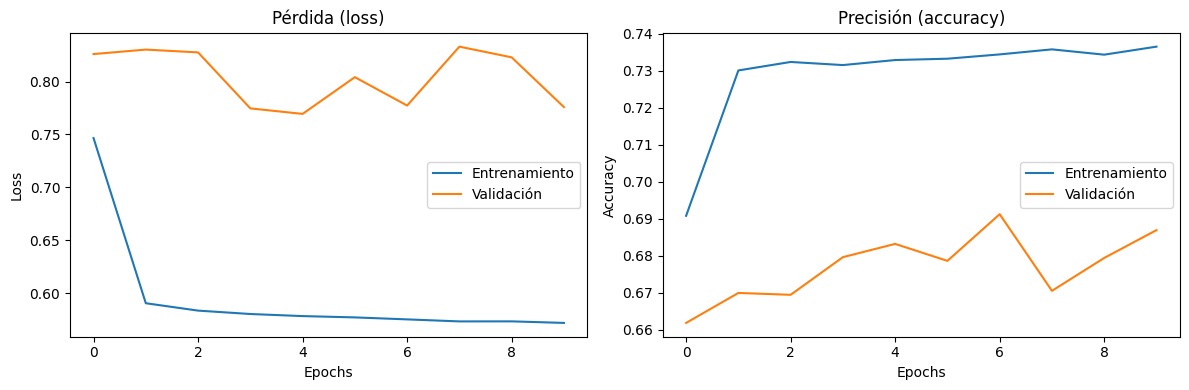

In [24]:
plt.figure(figsize=(12, 4))


# Pérdida
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida (loss)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Precisión
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión (accuracy)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

In [31]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.utils import class_weight
from imblearn.over_sampling import SMOTE

# 1. Separar características y etiqueta
X = df.drop(columns='vive')
y = df['vive']

# 2. División de datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Aplicar SMOTE al entrenamiento
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# 4. Asegurar que X_test tiene las mismas columnas y orden que X_train_smote
X_test = X_test[X_train_smote.columns]

# 5. Calcular class weights
weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(enumerate(weights))

# 6. Definir el modelo
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_smote.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# 7. Compilar
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# 8. Entrenar
history = model.fit(X_train_smote, y_train_smote, epochs=10, batch_size=16,
                    validation_split=0.2, verbose=1, class_weight=class_weights)

# 9. Evaluar
test_loss, test_acc = model.evaluate(X_test, y_test)

# 10. Predecir
y_pred = (model.predict(X_test) >= 0.5).astype(int)

# 11. Reporte
print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

Epoch 1/10
3492/3492 [==============================] - 7s 2ms/step - loss: 0.7414 - accuracy: 0.5208 - val_loss: 0.1569 - val_accuracy: 0.9707
Epoch 2/10
3492/3492 [==============================] - 6s 2ms/step - loss: 0.6797 - accuracy: 0.6147 - val_loss: 0.1305 - val_accuracy: 0.9702
Epoch 3/10
3492/3492 [==============================] - 7s 2ms/step - loss: 0.6375 - accuracy: 0.6613 - val_loss: 0.1075 - val_accuracy: 0.9788
Epoch 4/10
3492/3492 [==============================] - 7s 2ms/step - loss: 0.6086 - accuracy: 0.6813 - val_loss: 0.1255 - val_accuracy: 0.9689
Epoch 5/10
3492/3492 [==============================] - 7s 2ms/step - loss: 0.5863 - accuracy: 0.6993 - val_loss: 0.1172 - val_accuracy: 0.9751
Epoch 6/10
3492/3492 [==============================] - 7s 2ms/step - loss: 0.5678 - accuracy: 0.7088 - val_loss: 0.0917 - val_accuracy: 0.9861
Epoch 7/10
3492/3492 [==============================] - 7s 2ms/step - loss: 0.5531 - accuracy: 0.7142 - val_loss: 0.0856 - val_accuracy:

In [32]:
# Aquí asume que ya tienes X_train_smote, y_train_smote definidos con SMOTE

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_smote.shape[1],)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(X_train_smote, y_train_smote, epochs=5, batch_size=16,
                    validation_split=0.2, verbose=0)

test_loss, test_acc = model.evaluate(X_test, y_test)

y_pred = (model.predict(X_test) >= 0.5).astype(int)

print("Matriz de confusión:\n", confusion_matrix(y_test, y_pred))
print("Reporte de clasificación:\n", classification_report(y_test, y_pred))

313/313 [==============================] - 0s 1ms/step
Matriz de confusión:
 [[ 473  855]
 [ 993 7679]]
Reporte de clasificación:
               precision    recall  f1-score   support

         0.0       0.32      0.36      0.34      1328
         1.0       0.90      0.89      0.89      8672

    accuracy                           0.82     10000
   macro avg       0.61      0.62      0.62     10000
weighted avg       0.82      0.82      0.82     10000



313/313 [==============================] - 0s 1ms/step


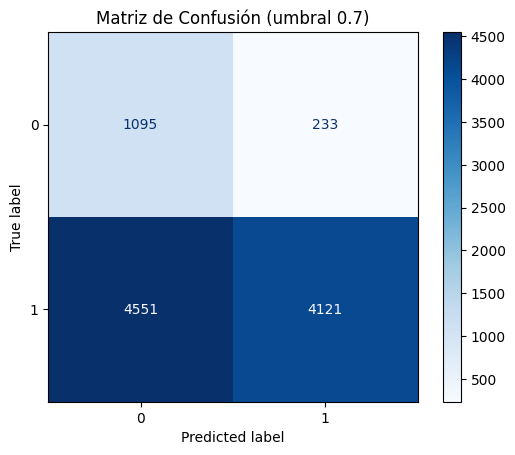

In [33]:
# Predecir probabilidades
y_probs = model.predict(X_test)

# Aplicar un umbral más alto, por ejemplo 0.7 en vez de 0.5
y_pred = (y_probs >= 0.9).astype(int)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.title("Matriz de Confusión (umbral 0.7)")
plt.show()

313/313 [==============================] - 0s 1ms/step


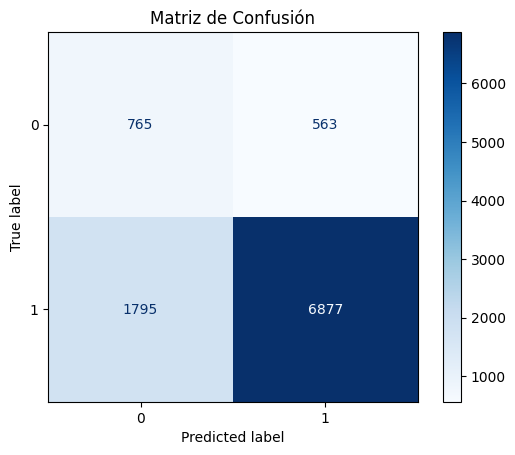

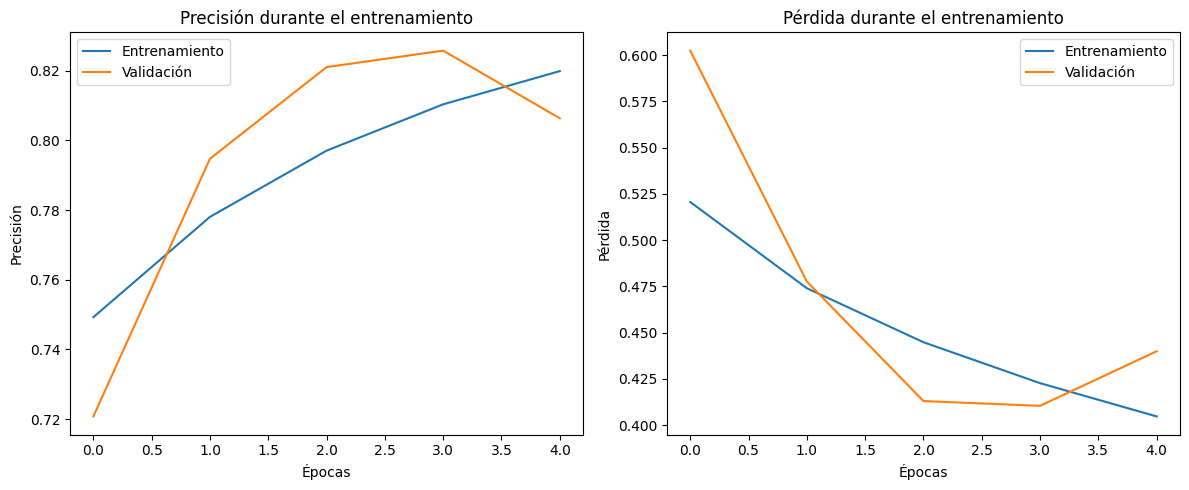

In [34]:
# Predicciones
y_pred_prob = model.predict(X_test).flatten()
y_pred = (y_pred_prob >= 0.7).astype(int)

# Matriz de confusión
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap="Blues", values_format='d')
plt.title("Matriz de Confusión")
plt.show()

# Historial de entrenamiento
plt.figure(figsize=(12, 5))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Entrenamiento')
plt.plot(history.history['val_accuracy'], label='Validación')
plt.title('Precisión durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Precisión')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Entrenamiento')
plt.plot(history.history['val_loss'], label='Validación')
plt.title('Pérdida durante el entrenamiento')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()

plt.tight_layout()
plt.show()